In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('earthquake_dataset.csv')

In [3]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312


In [4]:
mag_range = df['Mag'].max() - df['Mag'].min()
print("Range values of magnitude column: ", mag_range)

Range values of magnitude column:  6.4


In [5]:
df['Mag'].min()

1.1

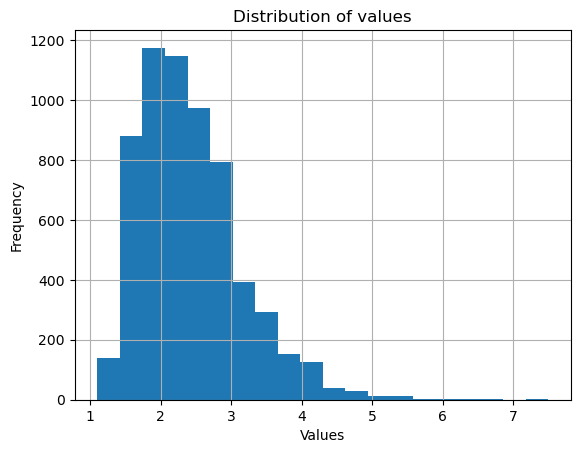

In [6]:
import matplotlib.pyplot as plt

df['Mag'].hist(bins=20)  # Adjust bins as needed for better visualization
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In [7]:
df['Mag'].describe()

count    6170.000000
mean        2.416224
std         0.711643
min         1.100000
25%         1.900000
50%         2.300000
75%         2.800000
max         7.500000
Name: Mag, dtype: float64

We will use the 25% 50% and 75% as our point of reference to separate our magnitude into four parts with their categories.

In [8]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312


In [9]:
def getRichter(magnitude):
    if (magnitude < 1.9):
        return 0
    elif (magnitude < 2.3):
        return 1
    elif (magnitude < 2.8):
        return 2
    else:
        return 3

In [10]:
df['Earthquake Category'] = 0
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,0
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,0
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,0
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,0
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,0


In [11]:
for index, row in df.iterrows():
    df.loc[index, 'Earthquake Category'] = getRichter(row['Mag'])
df.head(23)

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,3
5,25,4,1450,7.81,125.07,11,4.0,7,361,17,8714,3
6,25,4,1416,12.40,125.71,9,2.4,33,491,33,6821,2
7,25,4,1302,11.86,125.94,27,2.5,53,208,33,2801,2
8,25,4,2444,7.77,127.18,13,3.2,72,39,31,8204,3
9,25,4,2436,7.80,127.15,15,2.6,70,39,31,8204,2


In [12]:
df.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Earthquake Category
0,25,4,1919,8.50,124.42,1,2.4,9,292,53,9019,2
1,25,4,1813,18.13,120.81,27,2.1,5,124,37,2911,1
2,25,4,1808,14.71,121.78,8,2.5,15,251,68,2412,2
3,25,4,1706,5.64,126.33,105,2.9,82,267,30,8014,3
4,25,4,1647,8.07,126.71,29,3.9,33,314,81,8312,3


In [13]:
data = df

In [14]:
print(data.shape)  #display the dataset dimension

(6170, 12)


In [15]:
data.dtypes  #display the data types

Day                      int64
Month                    int64
Time                     int64
Latitude(ÂºN)          float64
Longitude(ÂºE)         float64
Depth(km)                int64
Mag                    float64
Distance(km)             int64
City                     int64
Province                 int64
Zip Code                 int64
Earthquake Category      int64
dtype: object

In [16]:
data.info()  #display the data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6170 entries, 0 to 6169
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Day                  6170 non-null   int64  
 1   Month                6170 non-null   int64  
 2   Time                 6170 non-null   int64  
 3   Latitude(ÂºN)        6170 non-null   float64
 4   Longitude(ÂºE)       6170 non-null   float64
 5   Depth(km)            6170 non-null   int64  
 6   Mag                  6170 non-null   float64
 7   Distance(km)         6170 non-null   int64  
 8   City                 6170 non-null   int64  
 9   Province             6170 non-null   int64  
 10  Zip Code             6170 non-null   int64  
 11  Earthquake Category  6170 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 578.6 KB


In [17]:
data.describe()  #display the summarized info of dataset

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Depth(km),Mag,Distance(km),City,Province,Zip Code,Earthquake Category
count,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000,6170.000000
mean,14.431767,2.345543,1230.412642,10.028420,124.899381,28.091410,2.416224,37.751540,267.015883,57.754619,6802.970016,1.559481
std,8.563833,1.111057,749.904752,3.620895,2.371969,33.602533,0.711643,44.809418,142.661262,26.932841,2257.336497,1.105892
min,1.000000,1.000000,100.000000,1.930000,118.550000,0.000000,1.100000,0.000000,0.000000,0.000000,1005.000000,0.000000
25%,7.000000,1.000000,511.250000,8.150000,123.170000,9.000000,1.900000,11.000000,164.000000,31.000000,5107.000000,1.000000
50%,14.000000,2.000000,1222.000000,8.760000,126.120000,22.000000,2.300000,23.000000,242.000000,73.000000,8210.000000,2.000000
75%,21.000000,3.000000,1932.000000,11.830000,126.610000,32.000000,2.800000,51.000000,364.000000,81.000000,8311.000000,3.000000
max,31.000000,4.000000,2459.000000,23.800000,128.440000,543.000000,7.500000,472.000000,588.000000,88.000000,9811.000000,3.000000


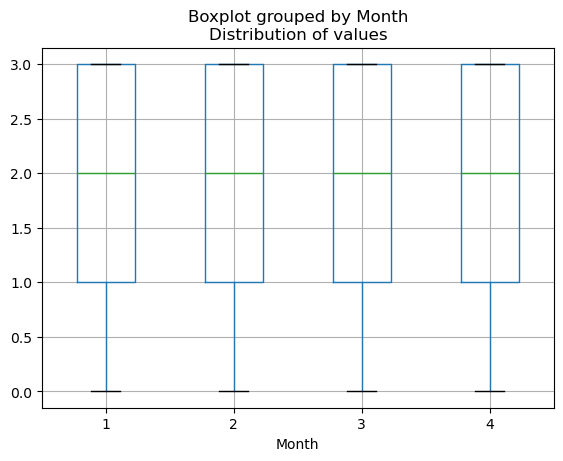

In [46]:
data.boxplot(column='Earthquake Category', by='Month')
plt.title('Distribution of values')
plt.grid(True)
plt.show()

In [18]:
#store in (X)
#store in (y)
X = data.drop(['Earthquake Category', 'Mag',  'Depth(km)'], axis=1)
y = data['Earthquake Category']

In [19]:
X.columns

Index(['Day', 'Month', 'Time', 'Latitude(ÂºN)', 'Longitude(ÂºE)',
       'Distance(km)', 'City', 'Province', 'Zip Code'],
      dtype='object')

In [20]:
X.head()


,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Distance(km),City,Province,Zip Code
0,25,4,1919,8.50,124.42,9,292,53,9019
1,25,4,1813,18.13,120.81,5,124,37,2911
2,25,4,1808,14.71,121.78,15,251,68,2412
3,25,4,1706,5.64,126.33,82,267,30,8014
4,25,4,1647,8.07,126.71,33,314,81,8312


In [21]:
from sklearn.preprocessing import StandardScaler
for feature in X.columns:
    scaler = StandardScaler()
    X[[feature]] = scaler.fit_transform(X[[feature]])
X.head()

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Distance(km),City,Province,Zip Code
0,1.234154,1.489205,0.918308,-0.422145,-0.202119,-0.641693,0.175143,-0.176550,0.981781
1,1.234154,1.489205,0.776945,2.237634,-1.724184,-0.730967,-1.002567,-0.770669,-1.724282
2,1.234154,1.489205,0.770277,1.293039,-1.315208,-0.507781,-0.112274,0.380436,-1.945357
3,1.234154,1.489205,0.634248,-1.212069,0.603184,0.987561,-0.000111,-1.030596,0.536530
4,1.234154,1.489205,0.555565,-0.540910,0.763402,-0.106047,0.329367,0.863157,0.668554


In [22]:
y

0       2
1       1
2       2
3       3
4       3
       ..
6165    0
6166    1
6167    2
6168    0
6169    1
Name: Earthquake Category, Length: 6170, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split  #import sci-kit learn library to split train & test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [24]:
X_train.shape, y_train.shape  #display X_train and y_train shape

((4319, 9), (4319,))

In [25]:
X_test.shape, y_test.shape  #display X_test and y_test shape

((1851, 9), (1851,))

In [26]:
X_train  #display the X_train

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Distance(km),City,Province,Zip Code
450,0.183138,1.489205,0.498220,-0.485671,0.708591,-0.217640,-0.175366,0.863157,0.667668
619,-0.167201,1.489205,1.032998,-0.400050,0.582103,-0.418507,-1.395137,0.863157,0.667225
1288,1.701273,-1.211146,0.242167,-0.626531,0.337561,-0.775604,1.450996,-1.104860,-2.467253
1928,0.183138,-1.211146,1.183696,-0.389002,0.830862,0.585827,-0.175366,0.863157,0.667668
1247,1.934832,-1.211146,-1.182129,2.732027,-1.344722,0.251049,1.324813,-1.698979,-1.284348
...,...,...,...,...,...,...,...,...,...
4931,1.234154,0.589088,0.552898,-0.985588,0.531508,-0.329233,-0.238457,-0.993463,0.623365
3264,1.467713,-0.311029,-1.430181,1.754289,-1.542886,-0.530100,-1.493280,0.083376,-1.373841
1653,0.767036,-1.211146,0.936978,-0.505004,0.902538,0.764376,0.329367,0.863157,0.668554
2607,-0.984658,-1.211146,0.506222,-1.098828,0.649563,0.898287,-0.238457,-0.993463,0.623365


In [27]:
y_train  #display the y_train

450     0
619     0
1288    2
1928    2
1247    2
       ..
4931    1
3264    1
1653    2
2607    0
2732    1
Name: Earthquake Category, Length: 4319, dtype: int64

In [28]:
X_test  #display the X_test

,Day,Month,Time,Latitude(ÂºN),Longitude(ÂºE),Distance(km),City,Province,Zip Code
5083,0.767036,0.589088,-1.058104,-0.960730,0.434535,-0.396189,-0.238457,-0.993463,0.623365
3847,-0.050422,-0.311029,0.438208,-0.474623,0.725456,-0.128366,-0.175366,0.863157,0.667668
4528,-1.568556,-0.311029,1.069006,0.931221,-1.327857,-0.574737,-1.325035,-0.287948,-0.843084
2526,-0.867879,-1.211146,0.830289,-0.355858,0.632698,-0.552418,0.679876,0.863157,0.665896
5349,0.299917,0.589088,-1.500862,0.779313,-0.813475,-0.173003,-0.659068,-0.250815,-1.454917
...,...,...,...,...,...,...,...,...,...
3807,0.066358,-0.311029,1.426413,-0.513290,0.767618,-0.016773,0.329367,0.863157,0.668554
6100,-1.451777,0.589088,-0.684693,-1.952278,0.708591,5.853004,-1.500290,-0.102286,0.536973
440,0.183138,1.489205,1.035665,1.544379,-2.120512,-0.708648,-1.065659,1.011686,-2.033964
2689,-1.101438,-1.211146,0.226164,2.674026,-1.407966,0.117138,-1.654514,-1.439052,-1.454473


In [29]:
y_test  #display the y_test

5083    2
3847    3
4528    2
2526    1
5349    0
       ..
3807    1
6100    3
440     2
2689    3
4999    0
Name: Earthquake Category, Length: 1851, dtype: int64

In [30]:
X_train.isnull().sum()  #check x_train for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
Distance(km)      0
City              0
Province          0
Zip Code          0
dtype: int64

In [31]:
y_train.isnull().sum()  #check y_train for null values

0

In [32]:
X_test.isnull().sum()  #check x_test for null values

Day               0
Month             0
Time              0
Latitude(ÂºN)     0
Longitude(ÂºE)    0
Distance(km)      0
City              0
Province          0
Zip Code          0
dtype: int64

In [33]:
y_test.isnull().sum()  #check y_test for null values

0

In [34]:
#import libraries to build the gradient boosting and fit the model
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=3,random_state=0)
gb_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_gb = gb_classifier.predict(X_test)

#get the accuracy score
acc_gb = round(accuracy_score(y_test,y_pred_gb)*100,2)

In [35]:
#import libraries to build the decision tree model and fit the model
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dt = dt_classifier.predict(X_test)

#get the accuracy score
acc_dt = round(accuracy_score(y_test,y_pred_dt)*100,2)

In [36]:
#import libraries to build the knn model and fit in the train data
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train)

#make predictions and store data for later
y_pred_knn = knn.predict(X_test) 

#get the accuracy score
acc_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)

In [37]:
#import libraries to build the random forest model and fit in the train data
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

#make predictions and store data for later
y_pred_rf = rf.predict(X_test)

#get the accuracy score
acc_rf = round(accuracy_score(y_test,y_pred_rf)*100,2)

In [38]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB() 
gnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_gnb = gnb.predict(X_test)  

#get the accuracy score
acc_gnb = round(accuracy_score(y_test,y_pred_gnb)*100,2)

In [39]:
#import libraries for SVM
from sklearn.svm import SVC

svm_classifier = SVC(C=100,kernel='rbf',gamma=1)     
svm_classifier.fit(X_train,y_train)

#make predictions and store data for later
y_pred_svm = svm_classifier.predict(X_test)

#get the accuracy score
acc_svm = round(accuracy_score(y_test,y_pred_svm)*100,2)

In [48]:
#import libraries for SVM
from sklearn.ensemble import AdaBoostClassifier

ada_boost = AdaBoostClassifier()     
ada_boost.fit(X_train,y_train)

#make predictions and store data for later
y_pred_ada = ada_boost.predict(X_test)

#get the accuracy score
acc_ada = round(accuracy_score(y_test,y_pred_ada)*100,2)

In [49]:
#import libraries for SVM
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()     
bg.fit(X_train,y_train)

#make predictions and store data for later
y_pred_bg = bg.predict(X_test)

#get the accuracy score
acc_bg = round(accuracy_score(y_test,y_pred_bg)*100,2)

In [50]:
#import libraries for SVM
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()     
etc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_etc = etc.predict(X_test)

#get the accuracy score
acc_etc = round(accuracy_score(y_test,y_pred_etc)*100,2)

In [51]:
#import libraries for SVM
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier()     
hgb.fit(X_train,y_train)

#make predictions and store data for later
y_pred_hgb = hgb.predict(X_test)

#get the accuracy score
acc_hgb = round(accuracy_score(y_test,y_pred_hgb)*100,2)

In [52]:
#import libraries for SVM
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier()     
mlpc.fit(X_train,y_train)

#make predictions and store data for later
y_pred_mlpc = mlpc.predict(X_test)

#get the accuracy score
acc_mlpc = round(accuracy_score(y_test,y_pred_mlpc)*100,2)

C:\Users\windows 11\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB() 
bnb.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_bnb = bnb.predict(X_test)  

#get the accuracy score
acc_bnb = round(accuracy_score(y_test,y_pred_bnb)*100,2)

In [54]:
#import libraries to build the Naive Bayes model and fit in the train data
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier() 
ext.fit(X_train, y_train)  

#make predictions and store data for later
y_pred_ext = ext.predict(X_test)  

#get the accuracy score
acc_ext = round(accuracy_score(y_test,y_pred_ext)*100,2)

In [55]:
from sklearn.dummy import DummyClassifier

dc = DummyClassifier(strategy='uniform')
dc.fit(X_train, y_train)

#make predictions and store data for later
y_pred_dc = dc.predict(X_test)  

#get the accuracy score
acc_dc = round(accuracy_score(y_test,y_pred_dc)*100,2)

In [56]:
#display the accuracy results
results = pd.DataFrame({
    'Model': ['Gradient Boosting','Decision Tree', 'K Nearest Neighbors', 
              'Random Forest', 'Naive Bayes','Support Vector Machine', 'Ada Boost', 
              'Bagging Classifier', 'Extra Trees', 'Hist Gradient Boosting',
              'MLPC Classifier', 'Bernoulli NB', 'Extra Tree Classifier', 'Dummy Classifier'],
    'Score': [acc_gb, acc_dt, acc_knn, 
              acc_rf, acc_gnb, acc_svm, acc_ada, acc_bg, acc_etc, acc_hgb, acc_mlpc, acc_bnb, acc_ext, acc_dc]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
40.30,Gradient Boosting
39.33,Ada Boost
39.11,Random Forest
37.76,Hist Gradient Boosting
37.33,MLPC Classifier
36.14,Bagging Classifier
36.09,Extra Trees
35.33,Naive Bayes
34.90,Bernoulli NB


In [41]:
y_pred_knn  #display prediction

array([0, 3, 1, ..., 0, 3, 0], dtype=int64)

In [42]:
y_test  #display actual values

5083    2
3847    3
4528    2
2526    1
5349    0
       ..
3807    1
6100    3
440     2
2689    3
4999    0
Name: Earthquake Category, Length: 1851, dtype: int64

In [57]:
#import libraries for root-mean-square error
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math

#display the root-mean-square error
MSE=np.square(np.subtract(y_test,y_pred_gb)).mean()
RMSE = (math.sqrt(MSE) * 100) 
print(RMSE)

124.90947559518051


In [58]:
#import libraries for confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_gb) 

print ("Confusion Matrix : \n", cm)  #display confusion matrix of multi class classification

Confusion Matrix : 
 [[216 100  68  32]
 [144 141  98  74]
 [102 136 137 110]
 [ 72  73  96 252]]


<Axes: xlabel='Predicted Values', ylabel='Actual Values'>

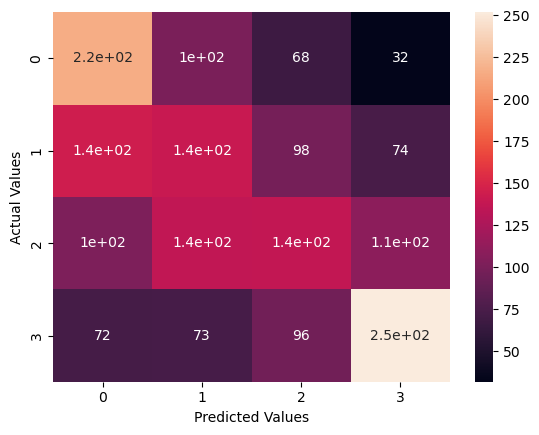

In [59]:
import seaborn as sns  #import package for plotting

#confusion matrix

cm = pd.crosstab(y_test, y_pred_gb, rownames=['Actual Values'], colnames=['Predicted Values'])
sns.heatmap(cm, annot=True)

In [52]:
data['Mag'].describe()

count    6170.000000
mean        2.416224
std         0.711643
min         1.100000
25%         1.900000
50%         2.300000
75%         2.800000
max         7.500000
Name: Mag, dtype: float64